# Preparations

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="tab10")

In [23]:
import scipy.stats as st

## Load Dataset

In [4]:
df = pd.read_csv('water_potability.csv', header=None)
df.columns = ["id", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"]
df.columns = [s.lower() for s in df.columns]
df.head()

,id,ph,hardness,solids,chloramines,sulfate,conductivity,organiccarbon,trihalomethanes,turbidity,potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


## Descriptive Statistics - 1

Pada bagian ini, perhatikan bahwa std dan variance dihitung dari pandas. Maka, rumusnya adalah rumus std dan varians untuk populasi. Jika ingin menghitung std/varians sampel, harus dilakukan terlebih dahulu perkalian n/(n-1) pada varians. Namun, karena n = 2010, sehingga n/(n-1) mendekati 1, hasil dari pandas sudah dapat mewakili std/varians sampel. 

Dengan kata lain,
$$ \sigma \approx s $$
dan rasio n/(n-1) tidak lagi signifikan.

In [5]:
df.potability = df.potability.astype('object') # Karena kategorikal, diganti saja. tujuannya biar gk muncul waktu di describe
df.dtypes

id                   int64
ph                 float64
hardness           float64
solids             float64
chloramines        float64
sulfate            float64
conductivity       float64
organiccarbon      float64
trihalomethanes    float64
turbidity          float64
potability          object
dtype: object

In [6]:
from scipy import stats
from scipy.optimize import minimize

# MASI BELUM SOLVED
def get_continuous_mode(col):
    params = stats.norm.fit(df[col])
    def density(x):
        return -stats.norm.pdf(x,*params)

    return minimize(density, 0).x[0]

In [7]:
desc = df.describe()[df.columns[1:-1]].T
desc["range"] = desc["max"] - desc["min"]
desc["IQR"] = desc["75%"] - desc["25%"]
desc["var"] = desc.apply(lambda x: df[x.name].var(), axis=1)
desc["skew"] = desc.apply(lambda x: df[x.name].skew(), axis=1)
desc["kurtosis"] = desc.apply(lambda x: df[x.name].kurt(), axis=1)
desc["median"] = desc.apply(lambda x: df[x.name].median(), axis=1)

# modes = [get_continuous_mode(col) for col in df.columns[1:-1]]
# modes.append(df['potability'].mode()[0])
# desc["modus"] = modes

In [8]:
desc = desc[["mean", "median", "std", "var", "range", "min", "max", "25%", "50%", "75%", "IQR", "skew", "kurtosis"]]
desc.rename(columns={"25%" : "Q1", "50%" : "Q2", "75%" : "Q3"}, inplace=True)
desc

,mean,median,std,var,range,min,max,Q1,Q2,Q3,IQR,skew,kurtosis
ph,7.087193,7.029490,1.572803,2.473709e+00,13.772501,0.227499,14.000000,6.090785,7.029490,8.053006,1.962221,0.048535,0.626904
hardness,195.969209,197.203525,32.643166,1.065576e+03,243.845890,73.492234,317.338124,176.740657,197.203525,216.447589,39.706932,-0.085321,0.525480
solids,21904.673439,20926.882155,8625.397911,7.439749e+07,56167.729801,320.942611,56488.672413,15614.412962,20926.882155,27170.534649,11556.121687,0.591011,0.337320
chloramines,7.134322,7.142014,1.585214,2.512904e+00,11.736129,1.390871,13.127000,6.138326,7.142014,8.109933,1.971607,0.013003,0.549782
sulfate,333.211376,332.214113,41.211111,1.698356e+03,352.030642,129.000000,481.030642,307.626986,332.214113,359.268147,51.641161,-0.045728,0.786854
conductivity,426.476708,423.438372,80.701872,6.512792e+03,551.722883,201.619737,753.342620,366.619219,423.438372,482.209772,115.590553,0.268012,-0.237206
organiccarbon,14.357940,14.323286,3.325770,1.106075e+01,24.806707,2.200000,27.006707,12.122530,14.323286,16.683562,4.561031,-0.020220,0.031018
trihalomethanes,66.400717,66.482041,16.081109,2.586021e+02,115.422987,8.577013,124.000000,55.949993,66.482041,77.294613,21.344620,-0.051383,0.223017
turbidity,3.969497,3.967374,0.780471,6.091350e-01,5.044749,1.450000,6.494749,3.442882,3.967374,4.514663,1.071781,-0.032266,-0.049831


In [9]:
print("Modus potability =", df.potability.mode()[0])

Modus potability = 0


In [10]:
# Modus kolom lain
df.mode()

,id,ph,hardness,solids,chloramines,sulfate,conductivity,organiccarbon,trihalomethanes,turbidity,potability
0,1,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0
1,2,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207,NaN
2,3,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101,NaN
3,4,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554,NaN
4,5,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678,NaN
2006,2007,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439,NaN
2007,2008,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161,NaN
2008,2009,13.349889,306.627481,56351.396304,13.043806,476.539717,708.226364,24.755392,120.030077,6.494249,NaN


## Histogram and Boxplot Visualization - 2 & 3

In [72]:
def draw_boxplot(data, color, edge_color, ax, is_vertical=True):
    bplot = ax.boxplot(notch=True,
                        vert=is_vertical, 
                        patch_artist=True,  
                        x=data) 

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bplot[element], color=edge_color)

    for patch in bplot['boxes']:
        patch.set_facecolor(color)    

    return bplot

def draw_boxhist(col):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
    f.tight_layout()
    draw_boxplot(df[col], "lightblue", "blue", ax[0])
    sns.histplot(data=df[col], ax=ax[1], kde=True, fill=False)
    plt.show()

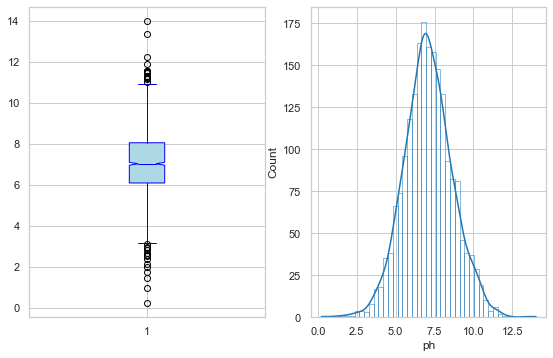

In [73]:
draw_boxhist("ph")

## Normality Test

In [59]:
from scipy import stats

for col in df.columns[1:-1]:
    pval = stats.shapiro(df[col]).pvalue
    if pval >= 0.05:
        print("Column", col, "is normally distributed")
    else:
        print("Column", col, "is not normally distributed")


Column ph is not normally distributed
Column hardness is not normally distributed
Column solids is not normally distributed
Column chloramines is not normally distributed
Column sulfate is not normally distributed
Column conductivity is not normally distributed
Column organiccarbon is normally distributed
Column trihalomethanes is normally distributed
Column turbidity is normally distributed


## Hypothesis 1 Test - 4

Pada dataset ini **(khususnya bagian 4A, 4B, dan 4C)**, digunakan t-test untuk melakukan uji hipotesis. T-test digunakan karena **data** yang tertera **merupakan data sampel**, bukan data populasi sehingga sebenarnya **variansi populasi tidak diketahui**. Namun, karena n = 2010 (>= 30) dan dapat dilihat pada bagian sebelumnya bahwa sebagian besar atribut berbentuk *bell-shaped*, maka t-test dapat didekati dengan z-test.

In [25]:
def compute_t_one(xbar, mu_0, std, n):
    return (xbar - mu_0)/(std/np.sqrt(n))

### Bagian A: Rata-rata pH di atas 7

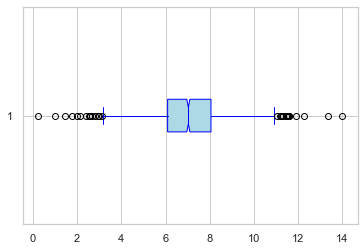

In [78]:
draw_boxplot(df["ph"], "lightblue", "blue", plt.subplot(), False)
plt.show()

Hipotesis
$$ 
^1H_0: \mu = 7 \\ \newline
^2H_1: \mu > 7 \\ \newline $$
dengan tingkat signifikansi
$$ ^3\alpha = 0.05 \newline $$
dan daerah kritis 
$$ ^4t > 1.645; \enspace v = \infty $$ 
dengan
$$ t = \frac{\bar x - \mu_0}{s/\sqrt{n}} $$ 

In [26]:
mu_0 = 7; n = df.shape[0]

std = desc.loc["ph"]["std"]
xbar = desc.loc["ph"]["mean"]
tscore = compute_t_one(xbar, mu_0, std, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", 1 - st.norm.cdf(tscore))

5.a) T-score = 2.485445147379887
5.b) P-value = 0.006469476288896492


**Kesimpulan**: karena p-value < 0.05 dan t > 1.645, hipotesis nol ditolak.

### Bagian B: Rata-rata hardness tidak sama dengan 205

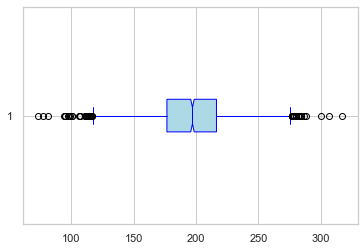

In [79]:
draw_boxplot(df["hardness"], "lightblue", "blue", plt.subplot(), False)
plt.show()

Hipotesis
$$ 
^1H_0: \mu = 205 \\ \newline
^2H_1: \mu \neq 205 \\ \newline 
$$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 \newline $$  
dan daerah kritisnya adalah
$$ ^4t < -1.96 \enspace or \enspace t > 1.96; \enspace v = \infty $$ 
dengan
$$ t = \frac{\bar x - \mu_0}{s/\sqrt{n}} $$ 

In [27]:
mu_0 = 205; n = df.shape[0]

std = desc.loc["hardness"]["std"]
xbar = desc.loc["hardness"]["mean"]
tscore = compute_t_one(xbar, mu_0, std, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", np.round(2 * st.norm.cdf(tscore), 2))

5.a) T-score = -12.403137170010732
5.b) P-value = 0.0


**Kesimpulan**: karena p-value < 0.05 dan t < -1.96, hipotesis nol ditolak. 

### Bagian C: Nilai rata-rata 100 baris pertama kolom Solids bukan 21900

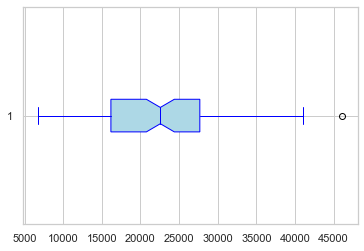

In [80]:
draw_boxplot(df["solids"].iloc[:100], "lightblue", "blue", plt.subplot(), False)
plt.show()

Hipotesis
$$ 
^1H_0: \mu = 21900 \\ \newline
^2H_1: \mu \neq 21900 \\ \newline 
$$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 \newline $$  
dan daerah kritisnya adalah
$$ ^4t < -1.984 \enspace or \enspace t > 1.984; \enspace v = 99 $$ 
dengan
$$ t = \frac{\bar x - \mu_0}{s/\sqrt{n}} $$ 

In [31]:
mu_0 = 21900; n = 100

std = df["solids"].iloc[:100].std()
xbar = df["solids"].iloc[:100].mean()
tscore = compute_t_one(xbar, mu_0, std, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", 2*(1 - st.norm.cdf(tscore)))

5.a) T-score = 0.5636797715721551
5.b) P-value = 0.5729720864655174


**Kesimpulan**: Karena p-value > 0.05 dan -1.984 < t < 1.984, hipotesis nol tidak ditolak. 

### Bagian D: Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

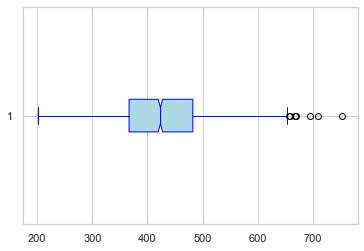

In [81]:
draw_boxplot(df["conductivity"], "lightblue", "blue", plt.subplot(), False)
plt.show()

Hipotesis
$$ 
^1H_0: p_0 = 0.1 \\ \newline
^2H_1: p_0 \neq 0.1 \\ \newline 
$$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 \newline $$  
dan uji statistiknya adalah binomial acak
$$ ^4 X $$ 
serta daerah kritisnya (didekati dengan Z) 
$$ ^4z < -1.96 \enspace or \enspace z > 1.96 $$
P-value binomial yang dihitung adalah
$$ P = 2P(X \ge \enspace 745 \enspace|\enspace p = 0.1) $$

In [17]:
# Sampel menunjukkan bahwa proporsi yang lebih dari 450 adalah 745
x = sum(df.conductivity.apply(lambda x: 1 if x > 450 else 0)) 
p_0 = 0.1; n = df.shape[0]

mu = n*p_0; std = np.sqrt(mu*(1-p_0))
zscore = ((x - 0.5) - mu)/std # correction factor

# mu = 201, berarti x > np_0(mu)
print("5.a) Z-score =", zscore)
print("5.b) P-value =", 2*(1 - st.norm.cdf(zscore)))

5.a) Z-score = 40.409201153527206
5.b) P-value = 0.0


**Kesimpulan**: Karena p-value < 0.05 dan z > 1.96, hipotesis nol ditolak. 

### Bagian E: Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%

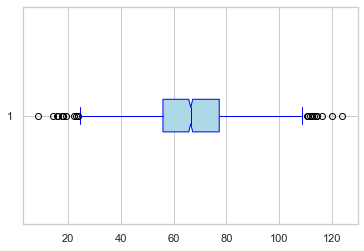

In [82]:
draw_boxplot(df["trihalomethanes"], "lightblue", "blue", plt.subplot(), False)
plt.show()

Hipotesis
$$ 
^1H_0: p_0 = 0.05 \\ \newline
^2H_1: p_0 < 0.05 \\ \newline 
$$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 \newline $$  
dan uji statistiknya adalah binomial acak
$$ ^4 X $$ 
serta daerah kritisnya (didekati dengan Z) 
$$ ^4z < -1.645 $$

P-value binomial yang dihitung adalah
$$ P = P(X \le \enspace 106 \enspace | \enspace p = 0.05) $$

In [18]:
# Sampel menunjukkan bahwa proporsi yang kurang dari 40 adalah 106
x = sum(df.trihalomethanes.apply(lambda x: 1 if x < 40 else 0))
p_0 = 0.05; n = df.shape[0]

mu = n*p_0; std = np.sqrt(mu*(1-p_0))
zscore = ((x + 0.5) - mu)/std # correction factor

print("5.a) Z-score =", zscore)
print("5.b) P-value =", st.norm.cdf(zscore))

5.a) Z-score = 0.6140537909095591
5.b) P-value = 0.7304101088817901


**Kesimpulan**: Karena p-value > 0.05 dan z > -1.645, hipotesis nol tidak ditolak. 

## Hypothesis 2 Test - 5

Pada bagian ini, digunakan t-test dengan asumsi ***unknown but equal variances***. Asumsi ini diambil karena data yang dibandingkan berdasarkan dari sampel yang sama. Maka, pastilah **variansi populasi dari sampel yang sama adalah sama** (juga). Mengapa digunakan t-test? Seperti yang sudah disebutkan pada bagian sebelumnya, karena n = 2010 (>= 30) dan dapat dilihat dari histogram plot bahwa sebagian besar atribut berbentuk *bell-shaped*, maka t-test dapat didekati dengan z-test.

In [32]:
def compute_t_two(x1, x2, d0, sp, n1, n2):
    numer = (x1 - x2) - d0 
    denom = sp*(np.sqrt(1/n1 + 1/n2))
    return numer/denom

def compute_sp(var1, var2, n1, n2):
    sp_squared = ((var1)*(n1 - 1) + (var2)*(n2-1))/(n1 + n2 - 2)
    return np.sqrt(sp_squared)

### Bagian A: Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama

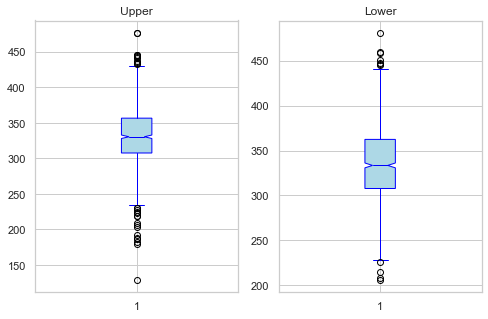

In [95]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
draw_boxplot(df.sulfate.iloc[:1005], "lightblue", "blue", ax[0])
draw_boxplot(df.sulfate.iloc[1005:], "lightblue", "blue", ax[1])
ax[0].set_title("Upper")
ax[1].set_title("Lower")
plt.show()

Hipotesis
$$ 
^1H_0: \mu_1 = \mu_2 \\ \newline
^2H_1: \mu_1 \neq \mu_2 \\ \newline 
$$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 \newline $$  
dan daerah kritisnya adalah
$$ ^4t < -1.96 \enspace or \enspace t > 1.96; \enspace v = \infty $$ 
dengan
$$ t = \frac{(\bar x_1 - \bar x_2) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}} $$ 
dan
$$ s_p^2 = \frac{s_1^2(n_1 -1) + s_2^2(n_2-1)}{n_1+n_2-2} $$

In [43]:
n = df.shape[0] // 2 
upper = df.sulfate.iloc[:n]
lower = df.sulfate.iloc[n:]

xbar_1 = upper.mean(); xbar_2 = lower.mean()
var_1 = upper.var(); var_2 = lower.var()

sp = compute_sp(var_1, var_2, n, n) 
tscore = compute_t_two(xbar_1, xbar_2, 0, sp, n, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", 2*st.norm.cdf(tscore))

5.a) T-score = -2.0752690696871983
5.b) P-value = 0.0379616043851286


**Kesimpulan**: Karena p-value < 0.05 dan t < -1.96, hipotesis nol ditolak.

### Bagian B: Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15

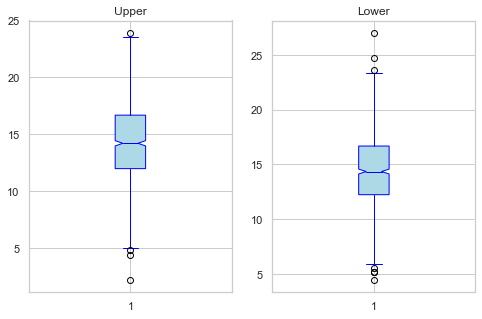

In [94]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
draw_boxplot(df.organiccarbon.iloc[:1005], "lightblue", "blue", ax[0])
draw_boxplot(df.organiccarbon.iloc[1005:], "lightblue", "blue", ax[1])
ax[0].set_title("Upper")
ax[1].set_title("Lower")
plt.show()

Hipotesis
$$ 
^1H_0: \mu_1 - \mu_2  = 0.15 \\ \newline
^2H_1: \mu_1 - \mu_2 > 0.15 \\ \newline 
$$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 \newline $$  
dan daerah kritisnya adalah
$$ ^4t > 1.645; \enspace v = \infty $$ 
dengan
$$ t = \frac{(\bar x_1 - \bar x_2) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}} $$ 
dan
$$ s_p^2 = \frac{s_1^2(n_1 -1) + s_2^2(n_2-1)}{n_1+n_2-2} $$

In [90]:
n = df.shape[0] // 2 
upper = df.organiccarbon.iloc[:n]
lower = df.organiccarbon.iloc[n:]

xbar_1 = upper.mean(); xbar_2 = lower.mean()
var_1 = upper.var(); var_2 = lower.var()

sp = compute_sp(var_1, var_2, n, n) 
tscore = compute_t_two(xbar_1, xbar_2, 0.15, sp, n, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", 1 - st.norm.cdf(tscore))

5.a) T-score = -2.413145517798807
5.b) P-value = 0.9920922480912


**Kesimpulan**: Karena p-value > 0.05 dan t < 1.645, hipotesis nol tidak ditolak

### Bagian C: Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya

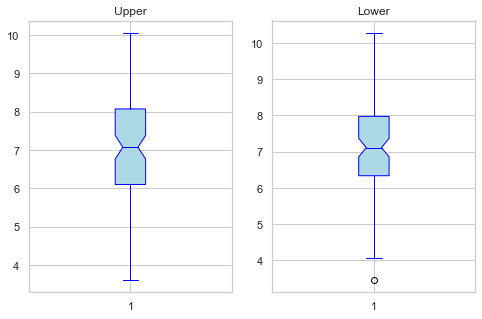

In [96]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
draw_boxplot(df.chloramines.iloc[:100], "lightblue", "blue", ax[0])
draw_boxplot(df.chloramines.iloc[df.shape[0] - 100:], "lightblue", "blue", ax[1])
ax[0].set_title("Upper")
ax[1].set_title("Lower")
plt.show()

Hipotesis
$$ 
^1H_0: \mu_1 = \mu_2 \\ \newline
^2H_1: \mu_1 \neq \mu_2 \\ \newline 
$$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 \newline $$  
dan daerah kritisnya adalah
$$ ^4t < -1.984 \enspace or \enspace t > 1.984; \enspace v = 99 $$ 
dengan
$$ t = \frac{(\bar x_1 - \bar x_2) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}} $$ 
dan
$$ s_p^2 = \frac{s_1^2(n_1 -1) + s_2^2(n_2-1)}{n_1+n_2-2} $$

In [92]:
n = 100
upper = df.chloramines.iloc[:n]
lower = df.chloramines.iloc[df.shape[0] - n:]

xbar_1 = upper.mean(); xbar_2 = lower.mean()
var_1 = upper.var(); var_2 = lower.var()

sp = compute_sp(var_1, var_2, n, n) 
tscore = compute_t_two(xbar_1, xbar_2, 0.15, sp, n, n)

print("5.a) T-score =", tscore)
print("5.b) P-value =", 2*st.norm.cdf(tscore))

5.a) T-score = -1.4654206021109755
5.b) P-value = 0.1428061999400448


**Kesimpulan**: Karena p-value > 0.05 dan -1.984 < t < 1.984, hipotesis nol tidak ditolak

### Bagian D: Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada proporsi nilai yang sama di bagian akhir Turbidity

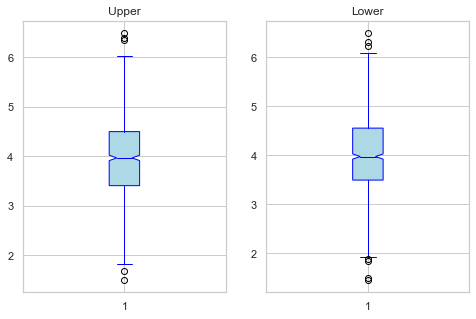

In [97]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
draw_boxplot(df.turbidity.iloc[:1005], "lightblue", "blue", ax[0])
draw_boxplot(df.turbidity.iloc[1005:], "lightblue", "blue", ax[1])
ax[0].set_title("Upper")
ax[1].set_title("Lower")
plt.show()

Hipotesis
$$ 
^1H_0: p_1 = p_2 \\ \newline
^2H_1: p_1 > p_2 \ \newline 
$$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 \newline $$  
dan daerah kritisnya adalah
$$ ^4z > 1.645 $$ 
dengan
$$ z = \frac{\hat p_1 - \hat p_2}{\sqrt{\hat p \hat q (1/n_1+1/n_2)}} $$

In [52]:
n = df.shape[0] // 2
x_1 = sum(df.turbidity.iloc[:n].apply(lambda x: 1 if x > 4 else 0))
x_2 = sum(df.turbidity.iloc[n:].apply(lambda x: 1 if x == 4 else 0))

p_1 = x_1/n; p_2 = x_2/n
p = (x_1 + x_2) / (2*n)
zscore = (p_1 - p_2)/np.sqrt(p*(1-p)*(1/n+1/n))

print("5.a) Z-score =", zscore)
print("5.b) P-value =", 2*(1 - st.norm.cdf(zscore)))

5.a) Z-score = 25.31766679551068
5.b) P-value = 0.0


**Kesimpulan**: Karena p-value < 0.05 dan z > 1.645 , hipotesis nol ditolak.

### Bagian E: Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya

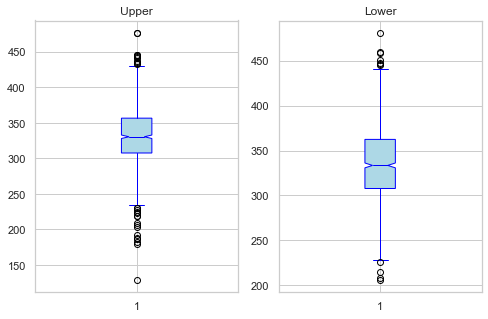

In [98]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
draw_boxplot(df.sulfate.iloc[:1005], "lightblue", "blue", ax[0])
draw_boxplot(df.sulfate.iloc[1005:], "lightblue", "blue", ax[1])
ax[0].set_title("Upper")
ax[1].set_title("Lower")
plt.show()

Hipotesis
$$ 
^1H_0: \sigma_1^2 = \sigma_2^2 \\ \newline
^2H_1: \sigma_1^2 \neq \sigma_2^2 \ \newline 
$$ 
dengan tingkat signifikan
$$ ^3\alpha = 0.05 \newline $$  
dan daerah kritisnya adalah
$$ ^4 f < 0.884 \enspace or f > 1.132 $$ 
dengan
$$ f = \frac{s_1^2}{s_2^2} $$

In [54]:
n = df.shape[0] // 2
var_1 = df.sulfate.iloc[:n].var()
var_2 = df.sulfate.iloc[n:].var()

fscore = var_1/var_2

print("5.a) F-score =", fscore)
print("5.b) P-value = 0.4068") # P = P(F > fscore)

5.a) F-score = 1.0152511043950063
5.b) P-value = 0.4068


**Kesimpulan**: arena 0.884 < f < 1.132, hipotesis nol tidak ditolak

## Correlation Test

Kolom targetnya diskrit :( gimana dong?

In [20]:
# df.corr()["potability"]